#Train Model ANN  Multi-Layer Perceptron (MLP)

In [ ]:
import pandas as pd
data1 = pd.read_csv("Thyroid_Diff_Clean.csv")

In [ ]:
data1.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Recurred,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,34,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,30,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,62,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,62,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
count = data1['Recurred']
print(count)

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Recurred, Length: 383, dtype: int64


In [ ]:
print(data1.isnull().sum())

Age                                                 0
Gender                                              0
Smoking                                             0
Hx Smoking                                          0
Hx Radiothreapy                                     0
Recurred                                            0
Thyroid Function_Clinical Hyperthyroidism           0
Thyroid Function_Clinical Hypothyroidism            0
Thyroid Function_Euthyroid                          0
Thyroid Function_Subclinical Hyperthyroidism        0
Thyroid Function_Subclinical Hypothyroidism         0
Physical Examination_Diffuse goiter                 0
Physical Examination_Multinodular goiter            0
Physical Examination_Normal                         0
Physical Examination_Single nodular goiter-left     0
Physical Examination_Single nodular goiter-right    0
Adenopathy_Bilateral                                0
Adenopathy_Extensive                                0
Adenopathy_Left             

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data1.drop('Recurred', axis=1)
y = data1['Recurred']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
count_0 = data1['Recurred'].value_counts().get(0, 0)
count_1 = data1['Recurred'].value_counts().get(1, 0)

print(f"Number of data with value 0: {count_0}")
print(f"Number of data with value 1: {count_1}")


Number of data with value 0: 275
Number of data with value 1: 108


In [ ]:
print(f"Total number of records: {len(X)}")
print(f"Number of records in training set: {len(X_train)}")
print(f"Number of records in test set: {len(X_test)}")


Total number of records: 383
Number of records in training set: 306
Number of records in test set: 77


In [ ]:
print(f"Total number of records: {len(y)}")
print(f"Number of records in y_train: {len(y_train)}")
print(f"Number of records in y_test: {len(y_test)}")


Total number of records: 383
Number of records in y_train: 306
Number of records in y_test: 77


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets, metrics, svm
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(10,), (15,), (20,)],
    'activation': ['relu', 'tanh'],
    'alpha': [1e-4, 1e-3],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [250, 300,500] ,
    'tol': [1e-4, 1e-5]
}


In [ ]:
model_ann = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator=model_ann, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(10,), (15,), (20,)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [250, 300, 500], 'solver': ['adam', 'sgd'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

#Evaluate Model ANN Multi-layer

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Best cross-validation score: {grid_search.best_score_ * 100:.2f}%')

Best hyperparameters:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam', 'tol': 1e-05}
Accuracy: 98.70%
Best cross-validation score: 94.44%


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['NO','YES']  # ระบุชื่อของคลาสที่ใช้ในการรายงาน
print("Classification report for ANN:\n", classification_report(y_test, y_pred, target_names=target_names))

Classification report for ANN:
               precision    recall  f1-score   support

          NO       0.98      1.00      0.99        58
         YES       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



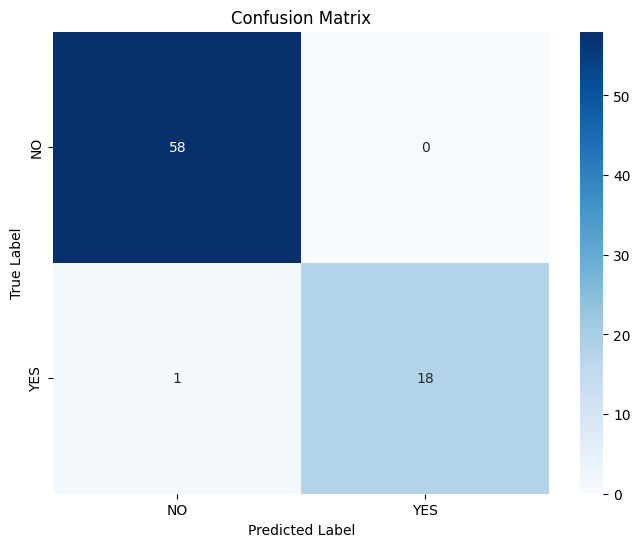

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Save Model

In [ ]:
# บันทึกโมเดล SVM ที่ดีที่สุดลงไฟล์
import joblib
joblib.dump(best_model, 'best_model_MLP.pkl')

['best_model_MLP.pkl']

#Depoly

In [ ]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_test.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', 'Risk_Low', 'T_T1a', 'T_T1b', 'T_T2', 'T_T3a',
       'T_T3b', 'T_T4a', 'T_T4b',

In [ ]:
X_test.iloc[4]

In [ ]:
y_test.iloc[4]

0

In [ ]:
y_test

In [ ]:
import pandas as pd
import joblib

# สร้างตัวแปรและกำหนดค่า 0 สำหรับแต่ละฟีเจอร์
Age = 0
Gender = 0
Smoking = 0
Hx_Smoking = 0
Hx_Radiotherapy = 0
Thyroid_Function_Clinical_Hyperthyroidism = 0
Thyroid_Function_Clinical_Hypothyroidism = 0
Thyroid_Function_Euthyroid = 0
Thyroid_Function_Subclinical_Hyperthyroidism = 0
Thyroid_Function_Subclinical_Hypothyroidism = 0
Physical_Examination_Diffuse_goiter = 0
Physical_Examination_Multinodular_goiter = 0
Physical_Examination_Normal = 0
Physical_Examination_Single_nodular_goiter_left = 0
Physical_Examination_Single_nodular_goiter_right = 0
Adenopathy_Bilateral = 0
Adenopathy_Extensive = 0
Adenopathy_Left = 0
Adenopathy_No = 0
Adenopathy_Posterior = 0
Adenopathy_Right = 0
Pathology_Follicular = 0
Pathology_Hurthel_cell = 0
Pathology_Micropapillary = 0
Pathology_Papillary = 0
Focality_Multi_Focal = 0
Focality_Uni_Focal = 0
Risk_High = 0
Risk_Intermediate = 0
Risk_Low = 0
T_T1a = 0
T_T1b = 0
T_T2 = 0
T_T3a = 0
T_T3b = 0
T_T4a = 0
T_T4b = 0
N_N0 = 0
N_N1a = 0
N_N1b = 0
M_M0 = 0
M_M1 = 0
Stage_I = 0
Stage_II = 0
Stage_III = 0
Stage_IVA = 0
Stage_IVB = 0
Response_Biochemical_Incomplete = 0
Response_Excellent = 0
Response_Indeterminate = 0
Response_Structural_Incomplete = 0


Age = int(input("Please enter your age: "))  # รับค่าเป็นตัวเลขและแปลงเป็น int
print(f"Age: {Age}")

# รับค่าเพศจากผู้ใช้
gender_input = input("Please enter your gender (M for Male, F for Female): ").upper()

# ตรวจสอบค่าและกำหนดค่าให้กับตัวแปร Gender
if gender_input == 'M':
    Gender = 1
elif gender_input == 'F':
    Gender = 0
else:
    print("Invalid input! Please enter 'M' for Male or 'F' for Female.")
    Gender = None  # กรณีที่ใส่ข้อมูลไม่ถูกต้อง

# แสดงผลลัพธ์
if Gender is not None:
    print(f"Gender: {Gender}")


# รับข้อมูล Hx_Smoking จากผู้ใช้
hx_smoking_input = input("Do you have a history of smoking? (Yes or No): ").lower()

# ตรวจสอบค่าและกำหนดให้กับตัวแปร Hx_Smoking
if hx_smoking_input == 'yes':
    Hx_Smoking = 1
elif hx_smoking_input == 'no':
    Hx_Smoking = 0
else:
    print("Invalid input for Hx_Smoking! Please enter 'Yes' or 'No'.")
    Hx_Smoking = None  # กรณีที่ใส่ข้อมูลไม่ถูกต้อง
# แสดงผลลัพธ์
if Hx_Smoking is not None:
    print(f"Hx_Smoking: {Hx_Smoking}")


# รับข้อมูล Hx_Radiotherapy จากผู้ใช้

hx_radiotherapy_input = input("Have you had radiotherapy? (Yes or No): ").lower()

# ตรวจสอบค่าและกำหนดให้กับตัวแปร Hx_Radiotherapy
if hx_radiotherapy_input == 'yes':
    Hx_Radiotherapy = 1
elif hx_radiotherapy_input == 'no':
    Hx_Radiotherapy = 0
else:
    print("Invalid input for Hx_Radiotherapy! Please enter 'Yes' or 'No'.")
    Hx_Radiotherapy = None  # กรณีที่ใส่ข้อมูลไม่ถูกต้อง

if Hx_Radiotherapy is not None:
    print(f"Hx_Radiotherapy: {Hx_Radiotherapy}")


# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the thyroid function:")
print("1: Clinical Hyperthyroidism")
print("2: Clinical Hypothyroidism")
print("3: Euthyroid")
print("4: Subclinical Hyperthyroidism")
print("5: Subclinical Hypothyroidism")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
thyroid_input = input("Enter the number corresponding to the thyroid function : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตามการทำงานของไทรอยด์
if thyroid_input == '1':
    Thyroid_Function_Clinical_Hyperthyroidism = 1
    print("You selected: Clinical Hyperthyroidism")
elif thyroid_input == '2':
    Thyroid_Function_Clinical_Hypothyroidism = 1
    print("You selected: Clinical Hypothyroidism")
elif thyroid_input == '3':
    Thyroid_Function_Euthyroid = 1
    print("You selected: Euthyroid")
elif thyroid_input == '4':
    Thyroid_Function_Subclinical_Hyperthyroidism = 1
    print("You selected: Subclinical Hyperthyroidism")
elif thyroid_input == '5':
    Thyroid_Function_Subclinical_Hypothyroidism = 1
    print("You selected: Subclinical Hypothyroidism")
else:
    print("Invalid input! Please enter a number between 1 and 5.")




# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the physical examination result:")
print("1: Diffuse goiter")
print("2: Multinodular goiter")
print("3: Normal")
print("4: Single nodular goiter-left")
print("5: Single nodular goiter-right")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
physical_exam_input = input("\nEnter the number corresponding to the physical examination result : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตามการตรวจร่างกาย
if physical_exam_input == '1':
    Physical_Examination_Diffuse_goiter = 1
    print("You selected: Diffuse goiter")
elif physical_exam_input == '2':
    Physical_Examination_Multinodular_goiter = 1
    print("You selected: Multinodular goiter")
elif physical_exam_input == '3':
    Physical_Examination_Normal = 1
    print("You selected: Normal")
elif physical_exam_input == '4':
    Physical_Examination_Single_nodular_goiter_left = 1
    print("You selected: Single nodular goiter-left")
elif physical_exam_input == '5':
    Physical_Examination_Single_nodular_goiter_right = 1
    print("You selected: Single nodular goiter-right")
else:
    print("Invalid input! Please enter a number between 1 and 5.")





# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the adenopathy result:")
print("1: Bilateral")
print("2: Extensive")
print("3: Left")
print("4: No")
print("5: Posterior")
print("6: Right")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
adenopathy_input = input("\nEnter the number corresponding to the adenopathy result : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตาม Adenopathy
if adenopathy_input == '1':
    Adenopathy_Bilateral = 1
    print("You selected: Bilateral")
elif adenopathy_input == '2':
    Adenopathy_Extensive = 1
    print("You selected: Extensive")
elif adenopathy_input == '3':
    Adenopathy_Left = 1
    print("You selected: Left")
elif adenopathy_input == '4':
    Adenopathy_No = 1
    print("You selected: No")
elif adenopathy_input == '5':
    Adenopathy_Posterior = 1
    print("You selected: Posterior")
elif adenopathy_input == '6':
    Adenopathy_Right = 1
    print("You selected: Right")
else:
    print("Invalid input! Please enter a number between 1 and 6.")





# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the pathology result:")
print("1: Follicular")
print("2: Hurthel cell")
print("3: Micropapillary")
print("4: Papillary")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
pathology_input = input("\nEnter the number corresponding to the pathology result : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตาม Pathology
if pathology_input == '1':
    Pathology_Follicular = 1
    print("You selected: Follicular")
elif pathology_input == '2':
    Pathology_Hurthel_cell = 1
    print("You selected: Hurthel cell")
elif pathology_input == '3':
    Pathology_Micropapillary = 1
    print("You selected: Micropapillary")
elif pathology_input == '4':
    Pathology_Papillary = 1
    print("You selected: Papillary")
else:
    print("Invalid input! Please enter a number between 1 and 4.")





# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the focality result:")
print("1: Multi-Focal")
print("2: Uni-Focal")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
focality_input = input("\nEnter the number corresponding to the focality result : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตาม Focality
if focality_input == '1':
    Focality_Multi_Focal = 1
    print("You selected: Multi-Focal")
elif focality_input == '2':
    Focality_Uni_Focal = 1
    print("You selected: Uni-Focal")
else:
    print("Invalid input! Please enter a number between 1 and 2.")

# แสดงผลลัพธ์
print(f"\nFocality_Multi_Focal: {Focality_Multi_Focal}")
print(f"Focality_Uni_Focal: {Focality_Uni_Focal}")


# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the risk level:")
print("1: High")
print("2: Intermediate")
print("3: Low")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
risk_input = input("\nEnter the number corresponding to the risk level : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตาม Risk
if risk_input == '1':
    Risk_High = 1
    print("You selected: High")
elif risk_input == '2':
    Risk_Intermediate = 1
    print("You selected: Intermediate")
elif risk_input == '3':
    Risk_Low = 1
    print("You selected: Low")
else:
    print("Invalid input! Please enter a number between 1 and 3.")



# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the T stage:")
print("1: T1a")
print("2: T1b")
print("3: T2")
print("4: T3a")
print("5: T3b")
print("6: T4a")
print("7: T4b")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
t_input = input("\nEnter the number corresponding to the T stage : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตาม T
if t_input == '1':
    T_T1a = 1
    print("You selected: T1a")
elif t_input == '2':
    T_T1b = 1
    print("You selected: T1b")
elif t_input == '3':
    T_T2 = 1
    print("You selected: T2")
elif t_input == '4':
    T_T3a = 1
    print("You selected: T3a")
elif t_input == '5':
    T_T3b = 1
    print("You selected: T3b")
elif t_input == '6':
    T_T4a = 1
    print("You selected: T4a")
elif t_input == '7':
    T_T4b = 1
    print("You selected: T4b")
else:
    print("Invalid input! Please enter a number between 1 and 7.")

# แสดงผลลัพธ์
print(f"\nT_T1a: {T_T1a}")
print(f"T_T1b: {T_T1b}")
print(f"T_T2: {T_T2}")
print(f"T_T3a: {T_T3a}")
print(f"T_T3b: {T_T3b}")
print(f"T_T4a: {T_T4a}")
print(f"T_T4b: {T_T4b}")

# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the N stage:")
print("1: N0")
print("2: N1a")
print("3: N1b")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
n_input = input("\nEnter the number corresponding to the N stage : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตาม N
if n_input == '1':
    N_N0 = 1
    print("You selected: N0")
elif n_input == '2':
    N_N1a = 1
    print("You selected: N1a")
elif n_input == '3':
    N_N1b = 1
    print("You selected: N1b")
else:
    print("Invalid input! Please enter a number between 1 and 3.")


# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the M stage:")
print("1: M0")
print("2: M1")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
m_input = input("\nEnter the number corresponding to the M stage : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตาม M
if m_input == '1':
    M_M0 = 1
    print("You selected: M0")
elif m_input == '2':
    M_M1 = 1
    print("You selected: M1")
else:
    print("Invalid input! Please enter a number between 1 and 2.")




# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the stage:")
print("1: Stage I")
print("2: Stage II")
print("3: Stage III")
print("4: Stage IVA")
print("5: Stage IVB")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
stage_input = input("\nEnter the number corresponding to the stage : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตาม Stage
if stage_input == '1':
    Stage_I = 1
    print("You selected: Stage I")
elif stage_input == '2':
    Stage_II = 1
    print("You selected: Stage II")
elif stage_input == '3':
    Stage_III = 1
    print("You selected: Stage III")
elif stage_input == '4':
    Stage_IVA = 1
    print("You selected: Stage IVA")
elif stage_input == '5':
    Stage_IVB = 1
    print("You selected: Stage IVB")
else:
    print("Invalid input! Please enter a number between 1 and 5.")



# แสดงตัวเลือกให้ผู้ใช้เลือก
print("\nPlease select the response:")
print("1: Biochemical Incomplete")
print("2: Excellent")
print("3: Indeterminate")
print("4: Structural Incomplete")

# รับข้อมูลเป็นตัวเลขจากผู้ใช้ พร้อมแสดงข้อมูลว่าแต่ละตัวเลขหมายถึงอะไร
response_input = input("\nEnter the number corresponding to the response : ")

# ตรวจสอบค่าและกำหนดให้กับตัวแปรตาม Response
if response_input == '1':
    Response_Biochemical_Incomplete = 1
    print("You selected: Biochemical Incomplete")
elif response_input == '2':
    Response_Excellent = 1
    print("You selected: Excellent")
elif response_input == '3':
    Response_Indeterminate = 1
    print("You selected: Indeterminate")
elif response_input == '4':
    Response_Structural_Incomplete = 1
    print("You selected: Structural Incomplete")
else:
    print("Invalid input! Please enter a number between 1 and 4.")


# แสดงผลลัพธ์
print(f"\nThyroid_Function_Clinical_Hyperthyroidism: {Thyroid_Function_Clinical_Hyperthyroidism}")
print(f"Thyroid_Function_Clinical_Hypothyroidism: {Thyroid_Function_Clinical_Hypothyroidism}")
print(f"Thyroid_Function_Euthyroid: {Thyroid_Function_Euthyroid}")
print(f"Thyroid_Function_Subclinical_Hyperthyroidism: {Thyroid_Function_Subclinical_Hyperthyroidism}")
print(f"Thyroid_Function_Subclinical_Hypothyroidism: {Thyroid_Function_Subclinical_Hypothyroidism}")

# แสดงผลลัพธ์
print(f"\nPhysical_Examination_Diffuse_goiter: {Physical_Examination_Diffuse_goiter}")
print(f"Physical_Examination_Multinodular_goiter: {Physical_Examination_Multinodular_goiter}")
print(f"Physical_Examination_Normal: {Physical_Examination_Normal}")
print(f"Physical_Examination_Single_nodular_goiter_left: {Physical_Examination_Single_nodular_goiter_left}")
print(f"Physical_Examination_Single_nodular_goiter_right: {Physical_Examination_Single_nodular_goiter_right}")

# แสดงผลลัพธ์
print(f"\nAdenopathy_Bilateral: {Adenopathy_Bilateral}")
print(f"Adenopathy_Extensive: {Adenopathy_Extensive}")
print(f"Adenopathy_Left: {Adenopathy_Left}")
print(f"Adenopathy_No: {Adenopathy_No}")
print(f"Adenopathy_Posterior: {Adenopathy_Posterior}")
print(f"Adenopathy_Right: {Adenopathy_Right}")

# แสดงผลลัพธ์
print(f"\nPathology_Follicular: {Pathology_Follicular}")
print(f"Pathology_Hurthel_cell: {Pathology_Hurthel_cell}")
print(f"Pathology_Micropapillary: {Pathology_Micropapillary}")
print(f"Pathology_Papillary: {Pathology_Papillary}")

# แสดงผลลัพธ์
print(f"\nRisk_High: {Risk_High}")
print(f"Risk_Intermediate: {Risk_Intermediate}")
print(f"Risk_Low: {Risk_Low}")


# แสดงผลลัพธ์
print(f"\nN_N0: {N_N0}")
print(f"N_N1a: {N_N1a}")
print(f"N_N1b: {N_N1b}")

# แสดงผลลัพธ์
print(f"\nM_M0: {M_M0}")
print(f"M_M1: {M_M1}")

# แสดงผลลัพธ์
print(f"\nStage_I: {Stage_I}")
print(f"Stage_II: {Stage_II}")
print(f"Stage_III: {Stage_III}")
print(f"Stage_IVA: {Stage_IVA}")
print(f"Stage_IVB: {Stage_IVB}")

# แสดงผลลัพธ์
print(f"\nResponse_Biochemical_Incomplete: {Response_Biochemical_Incomplete}")
print(f"Response_Excellent: {Response_Excellent}")
print(f"Response_Indeterminate: {Response_Indeterminate}")
print(f"Response_Structural_Incomplete: {Response_Structural_Incomplete}")




# โหลดโมเดลที่บันทึกไว้
best_model = joblib.load('best_model_MLP.pkl')


# สร้าง DataFrame จากค่าตัวแปร
data = {
    'Age': [Age],
    'Gender': [Gender],
    'Smoking': [Smoking],
    'Hx Smoking': [Hx_Smoking],
    'Hx Radiothreapy': [Hx_Radiotherapy],
    'Thyroid Function_Clinical Hyperthyroidism': [Thyroid_Function_Clinical_Hyperthyroidism],
    'Thyroid Function_Clinical Hypothyroidism': [Thyroid_Function_Clinical_Hypothyroidism],
    'Thyroid Function_Euthyroid': [Thyroid_Function_Euthyroid],
    'Thyroid Function_Subclinical Hyperthyroidism': [Thyroid_Function_Subclinical_Hyperthyroidism],
    'Thyroid Function_Subclinical Hypothyroidism': [Thyroid_Function_Subclinical_Hypothyroidism],
    'Physical Examination_Diffuse goiter': [Physical_Examination_Diffuse_goiter],
    'Physical Examination_Multinodular goiter': [Physical_Examination_Multinodular_goiter],
    'Physical Examination_Normal': [Physical_Examination_Normal],
    'Physical Examination_Single nodular goiter-left': [Physical_Examination_Single_nodular_goiter_left],
    'Physical Examination_Single nodular goiter-right': [Physical_Examination_Single_nodular_goiter_right],
    'Adenopathy_Bilateral': [Adenopathy_Bilateral],
    'Adenopathy_Extensive': [Adenopathy_Extensive],
    'Adenopathy_Left': [Adenopathy_Left],
    'Adenopathy_No': [Adenopathy_No],
    'Adenopathy_Posterior': [Adenopathy_Posterior],
    'Adenopathy_Right': [Adenopathy_Right],
    'Pathology_Follicular': [Pathology_Follicular],
    'Pathology_Hurthel cell': [Pathology_Hurthel_cell],
    'Pathology_Micropapillary': [Pathology_Micropapillary],
    'Pathology_Papillary': [Pathology_Papillary],
    'Focality_Multi-Focal': [Focality_Multi_Focal],
    'Focality_Uni-Focal': [Focality_Uni_Focal],
    'Risk_High': [Risk_High],
    'Risk_Intermediate': [Risk_Intermediate],
    'Risk_Low': [Risk_Low],
    'T_T1a': [T_T1a],
    'T_T1b': [T_T1b],
    'T_T2': [T_T2],
    'T_T3a': [T_T3a],
    'T_T3b': [T_T3b],
    'T_T4a': [T_T4a],
    'T_T4b': [T_T4b],
    'N_N0': [N_N0],
    'N_N1a': [N_N1a],
    'N_N1b': [N_N1b],
    'M_M0': [M_M0],
    'M_M1': [M_M1],
    'Stage_I': [Stage_I],
    'Stage_II': [Stage_II],
    'Stage_III': [Stage_III],
    'Stage_IVA': [Stage_IVA],
    'Stage_IVB': [Stage_IVB],
    'Response_Biochemical Incomplete': [Response_Biochemical_Incomplete],
    'Response_Excellent': [Response_Excellent],
    'Response_Indeterminate': [Response_Indeterminate],
    'Response_Structural Incomplete': [Response_Structural_Incomplete]
}


X_test = pd.DataFrame(data)


#X_test_values = X_test.values


# ใช้โมเดลในการพยากรณ์
y_pred = best_model.predict(X_test)

print(y_pred)


# แสดงผลลัพธ์ตามค่าที่ได้รับจากการพยากรณ์
for prediction in y_pred:
    if prediction == 0:
        print("\n---------- NO!! ----------")
        print("\n---------- ไม่มีความเสี่ยงกลับมาเป็นซ้ำ ----------")
    elif prediction == 1:
        print("\n---------- YES!! ----------")
        print("\n---------- มีความเสี่ยงกลับมาเป็นซ้ำ ----------")


Please enter your age: 30
Age: 30
Please enter your gender (M for Male, F for Female): F
Gender: 0
Do you have a history of smoking? (Yes or No): no
Hx_Smoking: 0
Have you had radiotherapy? (Yes or No): no
Hx_Radiotherapy: 0

Please select the thyroid function:
1: Clinical Hyperthyroidism
2: Clinical Hypothyroidism
3: Euthyroid
4: Subclinical Hyperthyroidism
5: Subclinical Hypothyroidism
Enter the number corresponding to the thyroid function : 3
You selected: Euthyroid

Please select the physical examination result:
1: Diffuse goiter
2: Multinodular goiter
3: Normal
4: Single nodular goiter-left
5: Single nodular goiter-right

Enter the number corresponding to the physical examination result : 1
You selected: Diffuse goiter

Please select the adenopathy result:
1: Bilateral
2: Extensive
3: Left
4: No
5: Posterior
6: Right

Enter the number corresponding to the adenopathy result : 1
You selected: Bilateral

Please select the pathology result:
1: Follicular
2: Hurthel cell
3: Micropapill

In [ ]:
# ตรวจสอบชื่อฟีเจอร์ที่ใช้ในการฝึกสอน
features_train = X_train.columns

# ตรวจสอบชื่อฟีเจอร์ใน X_test
features_test = X_test.columns

# ตรวจสอบชื่อฟีเจอร์ที่มีการเปลี่ยนแปลง
missing_features = set(features_train) - set(features_test)
new_features = set(features_test) - set(features_train)

print("Missing features in X_test:", missing_features)
print("New features in X_test:", new_features)

X_test = X_test[features_train]

Missing features in X_test: set()
New features in X_test: set()
